# Lab 9 Austin Nguyen

November 22, 2024

Explained Variance:
1 PC: 0.1001, 2 PCs: 0.1747, 3 PCs: 0.2393


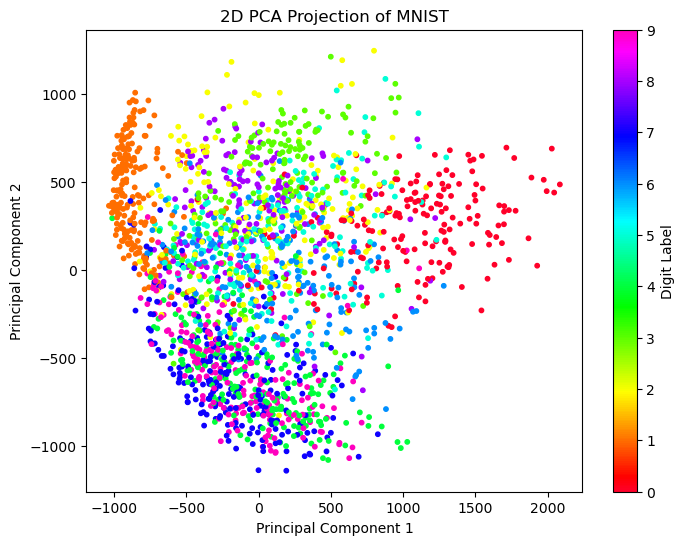

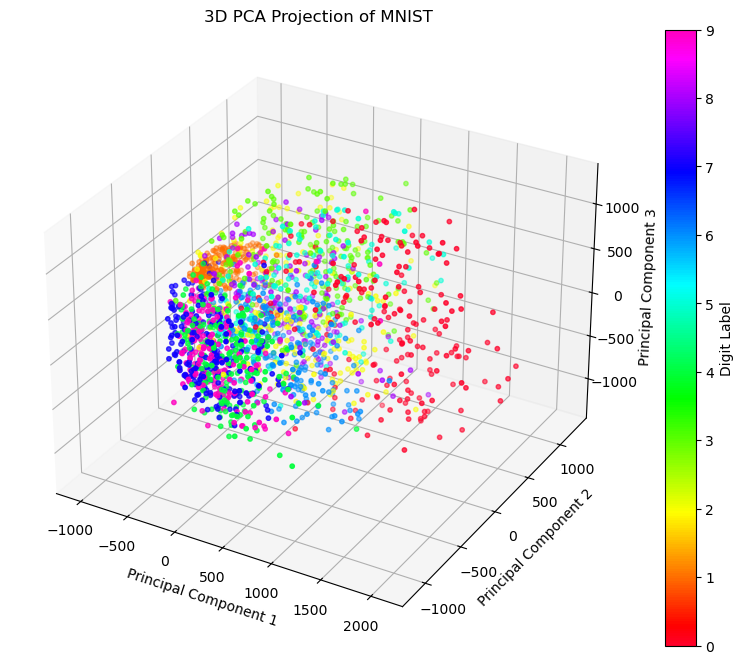

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml 

# MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:2000].astype(np.float64)  # 2000 samples
y = mnist.target[:2000].astype(int)       # Labels for the first 2000 samples

# Step 1: Center the data by subtracting the mean
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 3: Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Compute explained variance for 1, 2, and 3 components
explained_variances = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print("Explained Variance:")
print(f"1 PC: {explained_variances[0]:.4f}, 2 PCs: {explained_variances[1]:.4f}, 3 PCs: {explained_variances[2]:.4f}")

# Step 6: Project data onto 2D and 3D spaces
PC2 = eigenvectors[:, :2]  # First 2 principal components
PC3 = eigenvectors[:, :3]  # First 3 principal components

X_2D = np.dot(X_centered, PC2)
X_3D = np.dot(X_centered, PC3)


# 2D Scatter Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap='gist_rainbow', s=10)
plt.colorbar(scatter, label='Digit Label')
plt.title("2D PCA Projection of MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c=y, cmap='gist_rainbow', s=10)
plt.colorbar(scatter, label='Digit Label')
ax.set_title("3D PCA Projection of MNIST")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()